<a href="https://colab.research.google.com/github/alexlopespereira/machine_learning/blob/main/Notebooks/Aula1/Aula1_02_Treinamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




## 1. Plan
Definir o Objetivo

    Determine qual pergunta de negócio ou de pesquisa você deseja responder (por exemplo, prever vendas, classificar imagens).
    Se estiver num contexto corporativo, especifique os critérios de sucesso (por exemplo, uma acurácia-alvo, um limite de F1-score ou outras métricas de desempenho).

Coleta de Dados e Requisitos

    Identifique as fontes de dados (por exemplo, dados estruturados em banco de dados, arquivos CSV, APIs etc.).
    Planeje a aquisição dos dados, as permissões necessárias e a conformidade com regulamentações relevantes (como GDPR, HIPAA etc.).

Carregamento e Inspeção Inicial dos Dados

    Carregue o conjunto de dados em seu ambiente de análise (por exemplo, Python, R).
    Realize uma Análise Exploratória de Dados (EDA) para entender o tamanho, a estrutura e as distribuições.
    Documente possíveis anomalias ou valores ausentes.

## 2. DO


In [ ]:
# Carrega o dataset Iris
iris = load_iris()
X = iris.data # Cria uma variável X representando os dados de entrada do modelo
y = iris.target # Cria uma variável X representando os rótulos de cada registro do dataset
feature_names = iris.feature_names # Guarda os nomes das features
target_names = iris.target_names # Guarda o nome do rótulo

In [ ]:
type(X)

numpy.ndarray

In [ ]:
# Converte para DataFrame (opcional mas conveniente para visualizar e transformar)
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y # O rótulo se chamará target

In [ ]:
# ----- Limpeza & Preprocessamento -----
# Remove valores NaN
df.dropna(inplace=True)

# Separa features e o target (alvo) - novamente, mas agora como um dataframe e serie pandas
X = df.drop('target', axis=1)
y = df['target']


In [ ]:
type(X)

In [ ]:
# ----- Dividir (Split) o Dataset -----
# 30% dos dados reservados para teste e validação (test_size=0.3), 70% para treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Feature Engineering
# Padronizar (Standard) uma distribuição
# Média zero e desvio padrão 1
scaler = StandardScaler()
# Fit the scaler on the training set and transform
# Explicação do método fit_transform:
# Etapa de Fit
#     Calcula os parâmetros necessários para a transformação dos dados
#     No caso do StandardScaler, por exemplo, calcula a média e desvio padrão dos dados
#     Armazena estes parâmetros para uso posterior
# Etapa de Transform
#     Aplica a transformação aos dados usando os parâmetros calculados
#     Retorna os dados transformados em um único passo
X_train_scaled = scaler.fit_transform(X_train)


#### Porque só o transform e não o fit_transform?


In [ ]:
# Transform the validation and test sets with the already-fitted scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Model Training (Feed-Forward Neural Network / MLP)
# MLP Classifier = Multi-Layer Perceptron Classifier
model = MLPClassifier(
    hidden_layer_sizes=(3, 3), # Quantidade de neurônios em cada camada. Essa tupla tem dois elementos 3. Então, a rede terá duas camadas de 3 neuronios
    max_iter=1000, # Quantidade máxima de iterações
    random_state=42 # Semente para obter um experimento estável em várias iterações
)
# treina a rede neural usando backpropagation
model.fit(X_train_scaled, y_train) # O que são esses dois argumentos? por que não foi usado um y_train_scaled?

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=1000, random_state=42)

## 3. Check

### Cálculo da acurácia
#### Média da quantidade de acertos (predito igual ao gabarito)



$\text{Accuracy} = \frac{\text{Numero de Predições corretas}}{\text{Numero Total de  Predições}}$

In [ ]:
# Evaluate on training set
# Esse método retorna a acurácia média nos dados de treinamento e rótulos fornecidos.
model.score(X_train_scaled, y_train) # O que são esses dois argumentos? faça uma analogia com uma prova de um aluno nesse contexto.

0.819047619047619

In [ ]:
# Evaluate on test set
model.score(X_test_scaled, y_test) # O que são esses dois argumentos? faça uma analogia com uma prova de um aluno nesse contexto.

0.9333333333333333

#### Predição

In [ ]:
# 1. Convert numeric labels to the corresponding class names
y_test_pred = model.predict(X_test_scaled) #predição sobre quais dados?
actual_classes = [iris.target_names[i] for i in y_test]
predicted_classes = [iris.target_names[i] for i in y_test_pred]

# 2. Create a combined DataFrame with the features + actual + predicted
df_results = pd.DataFrame(X_test, columns=feature_names)
df_results['ActualClass'] = actual_classes
df_results['PredictedClass'] = predicted_classes

# 3. Print the DataFrame
df_results.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ActualClass,PredictedClass
73,6.1,2.8,4.7,1.2,versicolor,versicolor
18,5.7,3.8,1.7,0.3,setosa,setosa
118,7.7,2.6,6.9,2.3,virginica,virginica
78,6.0,2.9,4.5,1.5,versicolor,versicolor
76,6.8,2.8,4.8,1.4,versicolor,versicolor


## 2a Iteração de Otimização
#### Tentar uma outra função de ativação

In [ ]:
# 6. Model Training (Feed-Forward Neural Network / MLP)
model = MLPClassifier(
    hidden_layer_sizes=(4,3),
    learning_rate_init=0.01,
    solver= 'lbfgs',
    random_state=42
)
model.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(4, 3), learning_rate_init=0.01,
              random_state=42, solver='lbfgs')

In [ ]:
# O método score faz a predição, compara a predição com resultado esperado e retorna a acurácia
model.score(X_train_scaled, y_train)

0.9809523809523809

In [ ]:
model.score(X_test_scaled, y_test)

1.0

## 3a Iteração de Otimização
#### Fazer um experimento com dados de teste e de validação

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split( X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Fit the scaler on the training set and transform
X_train_scaled = scaler.fit_transform(X_train)
# Transform the validation and test sets with the already-fitted scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# MLP Classifier = Multi-Layer Perceptron Classifier
model = MLPClassifier(
    hidden_layer_sizes=(4,4),
    solver= 'lbfgs',
    max_iter=1000,
    random_state=42
)
model.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(4, 4), max_iter=1000, random_state=42,
              solver='lbfgs')

In [ ]:
model.score(X_train_scaled, y_train)

0.9809523809523809

In [ ]:
model.score(X_val_scaled, y_val)

1.0

In [ ]:
model.score(X_test_scaled, y_test)

1.0

# Exercício 1
### Crie um prompt que gere o código da 1a iteração (desde o carregamento dos dados até a predição)

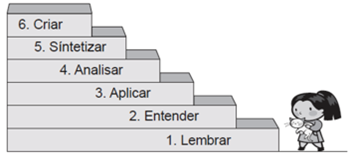